# House prices

## Background

Over recent years the housing market in the UK has been a hot topic for all varieties of peope. From business developers to general consumers, everyone wants to be involved. Can you blame them? The market has seen prices rise by an average for 53% over the last decade and rumours are, that figure is going to increase as time goes on. So I think we can all agree that purchasing properties would make a good investment statergy however is it really that easy? How do we know we are not overpaying or underselling the market value, this is where AI comes in...

## Primary Objective

The objective for this project is to use previously collected housing data to create an AI model that will accurately predict what the market value for property is depending on its features.

## Secondary Objectives

Run an analysis on the dataset to answer the following questions

* What feature has the biggest posative influence on the price of a property?
* What feature has the biggest negative influence on the price of a property?
* Can we engineer any new features into the data which will support the models performance?

## Dataset Overview

Unfortunately the dataset we will be using for this project will not be from the UK, this is due to any UK housing data being inaccessible, the data will be based on USA housing features and pricing.

The dataset will be pulled from Kaggle so initially the data comes in two seperate files, training and testing. In order to prevent any data leakage, analysis will only be completed on the training data.

The dataset will have 80 features and 1 target and just under 3000 rows before any preprocessing is applied.

The Target feature will be 'SalesPrice'.

## Report Contents

<h6>Prerequisites:</h6> <br>

* Python imports
* Data imports
* Data description
* Support functions

<h6>1. Data Cleaning</h6> <br>
    a. Training Data <br>
    b. Training Data cleaning summary <br>
    c. Test Data <br>
    d. Test Data cleaning summary
    
<h6>2. Data Exploration</h6> 

<hr>

### Python Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Imports

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_full = pd.concat([df_train, df_test])

pd.set_option('display.max_columns', None)

### Data description

In [3]:
# with open('data_description.txt', 'r') as f:
#     print(f.read())

<hr>

## Support Functions

#### Get missing data

In [4]:
# Create function to get missing data in percentage format
def get_missing_data(df):
    missing_data = 100 * df.isnull().sum() / len(df) 
    missing_data = missing_data.sort_values(ascending=True)
    return missing_data[missing_data > 0]

#### Visualise missing data

In [5]:
# create function to visualise missing data
def visualise_missing_data(fs, dpi, rotation, title, df, ylim):
    plt.figure(figsize=(fs), dpi=dpi)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylim(ylim)
    sns.barplot(x=df.index, y=df)
    plt.show()

<hr>

<h2>1. Data Cleaning</h2>

### 1a. Training data 

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.shape

(1460, 81)

In [8]:
# get missing training data
missing_data_training = get_missing_data(df_train)

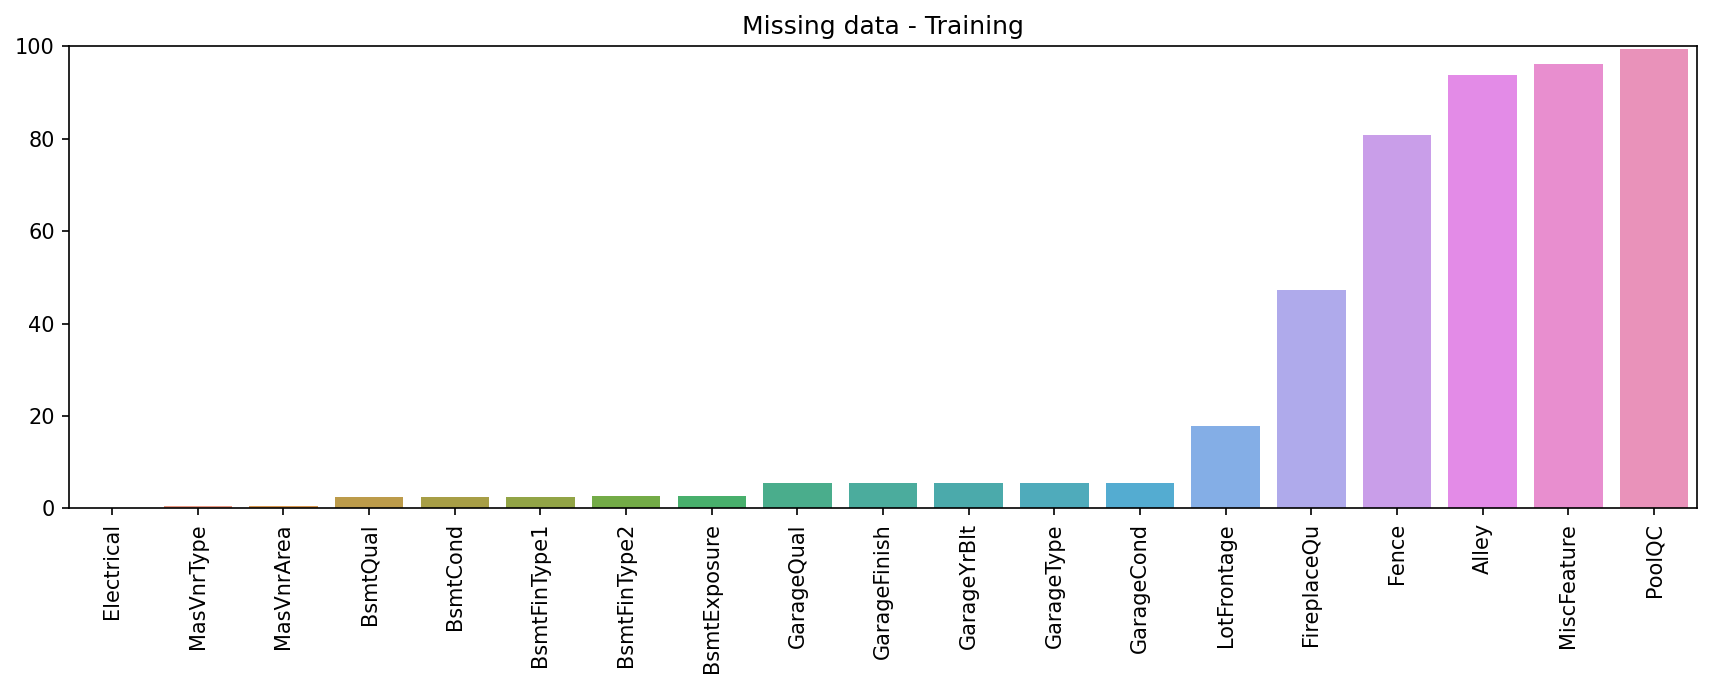

In [9]:
# Visualise Missing data
visualise_missing_data((14, 4), 150, 90, 'Missing data - Training', missing_data_training, (0, 100))

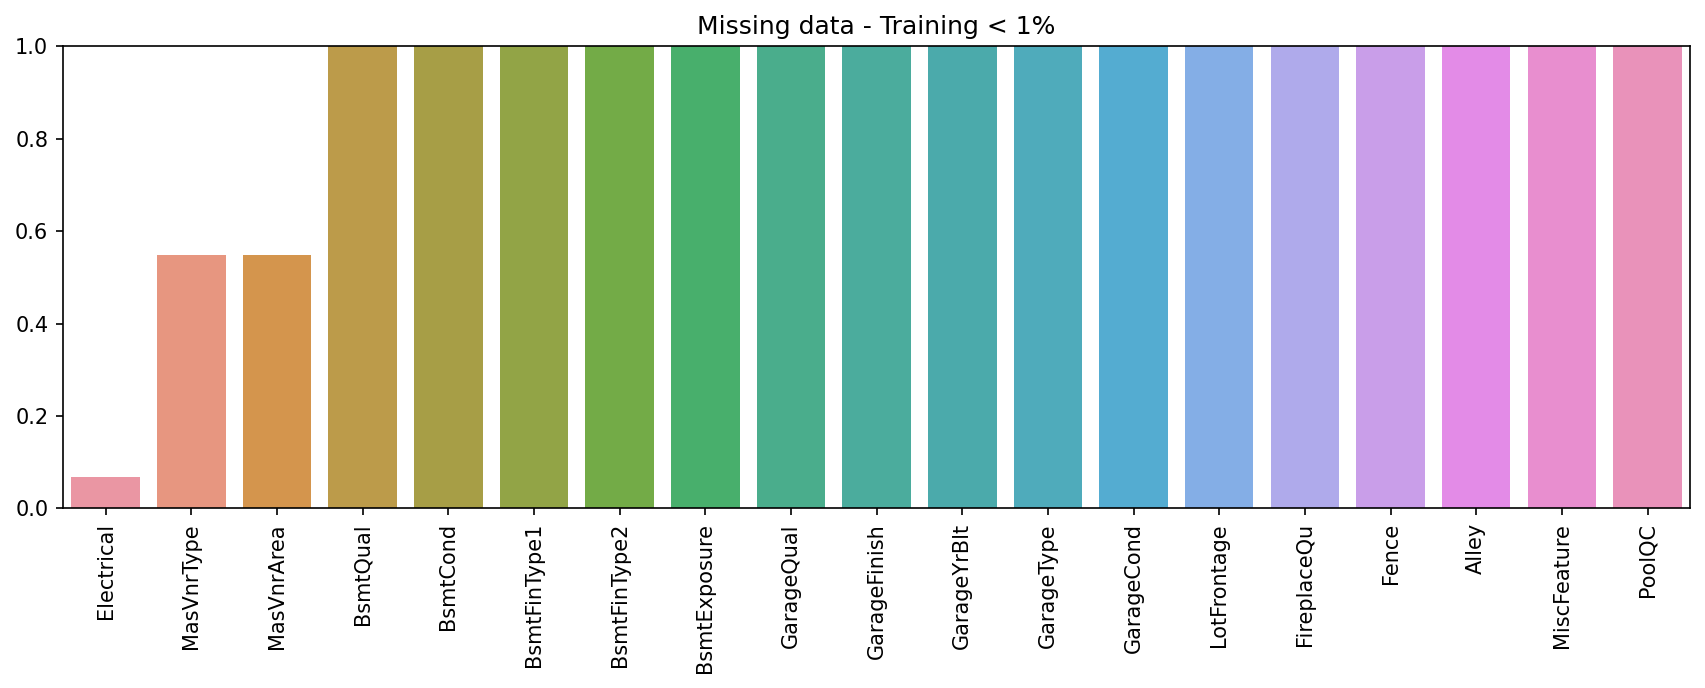

In [10]:
# Display all missing data under 1%
visualise_missing_data((14, 4), 150, 90, 'Missing data - Training < 1%', missing_data_training, (0, 1))

In [11]:
# Electrical - fill values - 'SBrkr'
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [12]:
# MasVnrType, MasVnrArea - fill values - 'None' / 0
df_train = df_train.fillna({'MasVnrType': 'None', 'MasVnrArea': 0})

In [13]:
# BsmtQual, BsmtFinType1, BsmtCond, BsmtExposure, BsmtFinType2
df_train = df_train.fillna({'BsmtQual': 'None',
                'BsmtFinType1': 'None',
                'BsmtCond': 'None',
                'BsmtExposure': 'None',
                'BsmtFinType2': 'None',})

In [14]:
# GarageQual, GarageFinish, GarageYrBlt, GarageCond, GarageType
df_train = df_train.fillna({
    'GarageQual': 'None',
    'GarageFinish': 'None',
    'GarageYrBlt': 0,
    'GarageCond': 'None',
    'GarageType': 'None',
})

<AxesSubplot: xlabel='LotFrontage', ylabel='LotConfig'>

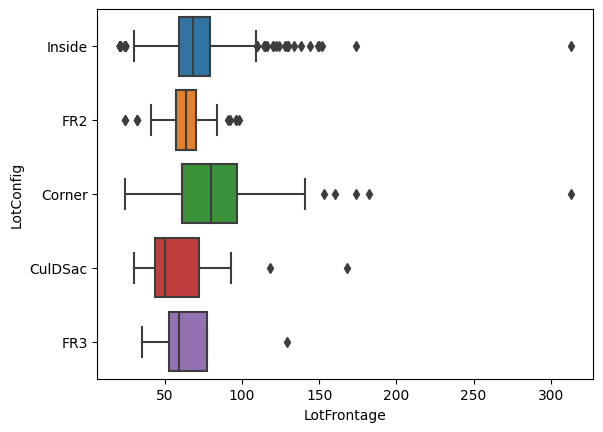

In [15]:
sns.boxplot(data=df_train, x='LotFrontage', y='LotConfig')

In [16]:
# LotFrontage - fill values - get mean after LotConfig groupby
df_train['LotFrontage'] = df_train.groupby('LotConfig')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [17]:
# FireplaceQu - fill value - 'None'
df_train = df_train.fillna({'FireplaceQu' : 'None'})

In [18]:
# Fence - fill values - 'None'
df_train['Fence'] = df_train['Fence'].fillna('None')

In [19]:
# Alley - fill values - 'None'
df_train['Alley'] = df_train['Alley'].fillna('None')

In [20]:
# MiscFeature - fill values - 'None'
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')

In [21]:
# PoolQC - fill values - 'None'
df_train['PoolQC'] = df_train['PoolQC'].fillna('None')

In [22]:
df_train.shape

(1460, 81)

### 1b. Training Data Cleaning summary

* <b>Electrical</b> missing value was changed to 'SBrkr' as this is the most comon value for the column by a huge margin.
* <b>MasVnrType, MasVnrArea</b> missing values were changed to 0 or 'None'.
* <b>BsmtQual, BsmtFinType1, BsmtCond, BsmtExposure, BsmtFinType2</b> all missing values were changed to 'None'.
* <b>GarageQual, GarageFinish, GarageYrBlt, GarageCond, GarageType</b> all missing values changed to 0 or 'None'
* <b>LotFrontage</b> Groupby used on LotConfig and then the LotFrontage mean was taken from each group, the missing values were changed to the mean value depending on the group it fell into.
* <b>FireplaceQu</b> missing values were all changed to 'None'.
* <b>Fence</b> all values were changed to 'None'.
* <b>Alley</b> all values were changed to 'None'.
* <b>MiscFeature</b> all values were changed to 'None'.
* <b>PoolQC</b> all values were changed to 'None'.

### 1c. Test Data

In [23]:
df_test.shape

(1459, 80)

In [24]:
# Get all missing data from test data
missing_data_test = get_missing_data(df_test)

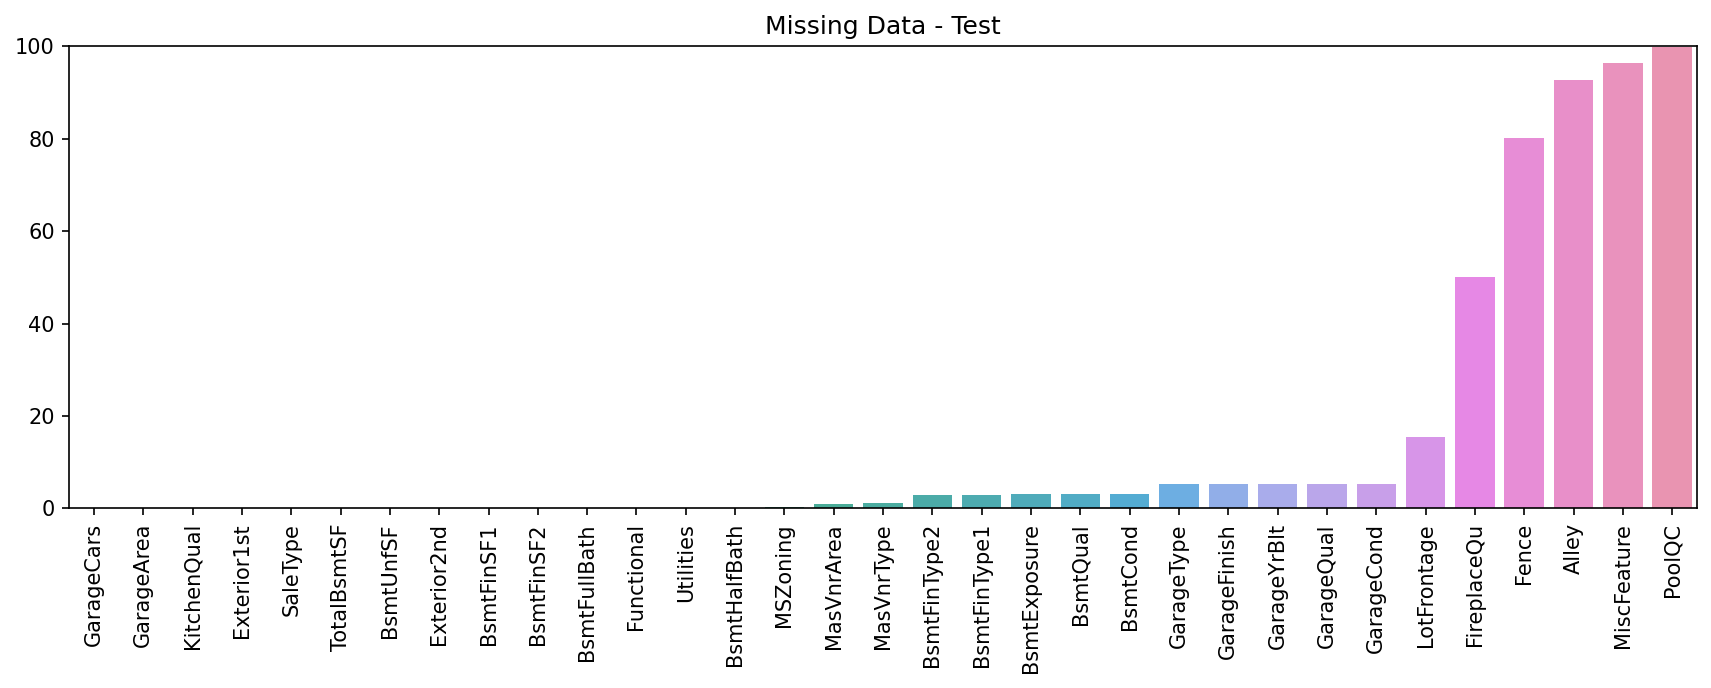

In [25]:
# Visualise missing data
visualise_missing_data((14, 4), 150, 90, 'Missing Data - Test', missing_data_test, (0, 100))

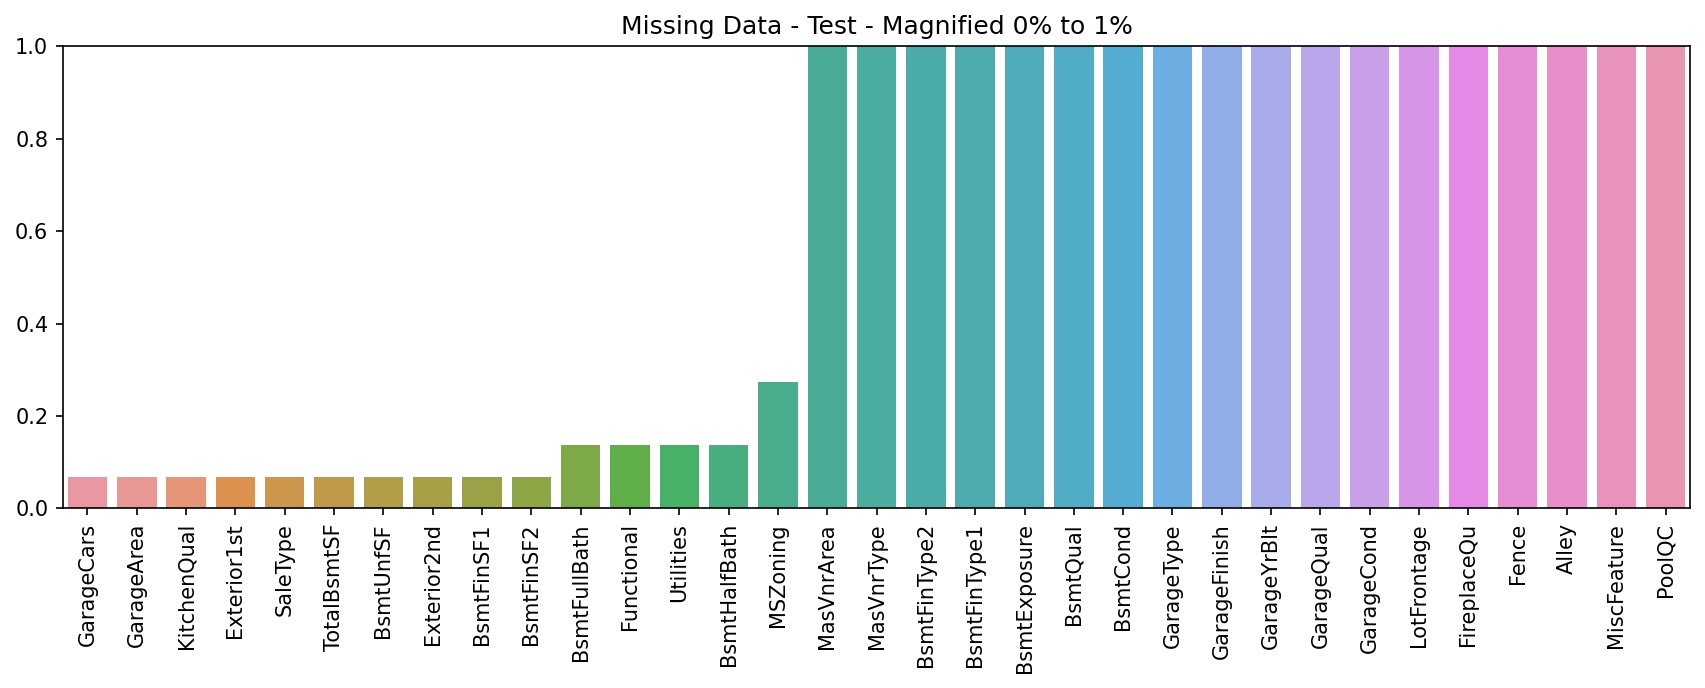

In [26]:
# Magnify missing data graph so we are able to view the smaller figures
visualise_missing_data((14, 4), 150, 90, 'Missing Data - Test - Magnified 0% to 1%', missing_data_test, (0, 1))

In [27]:
# Saletype, KitchenQual,Exterior1st,Exterior2nd   - drop rows
df_test = df_test.dropna(subset=('KitchenQual', 'SaleType', 'Exterior1st', 'Exterior2nd'))

In [28]:
# GarageCars, GarageArea - fill values - 0
df_test = df_test.fillna({'GarageCars': 0, 'GarageArea': 0})
df_test.at[1116,'GarageType']='None'

In [29]:
# BsmtUnfSF, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath - fill values - 0
df_test = df_test.fillna({'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'BsmtFinType2': 'None', 'BsmtFinType1': 'None' })

In [30]:
# Functional - fill values - 'Typ'
df_test['Functional'] = df_test['Functional'].fillna('Typ')

In [31]:
# Utilities - fill values - 'AllPub'
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')

In [32]:
# MSZonging - fill values - 'RL'
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [33]:
# MasVnrArea, MasVnrType - fill values - 0 and none
df_test = df_test.fillna({'MasVnrArea': 0, 'MasVnrType': 'None'})

In [34]:
# BsmtExposure, BsmtQual, BsmtCond - fill values - 'None'
bsmt_missing_rows_index = df_test[df_test['BsmtExposure'].isnull() 
        & df_test['BsmtQual'].isnull() 
        & df_test['BsmtCond'].isnull()].index

df_test.loc[bsmt_missing_rows_index] = df_test.loc[bsmt_missing_rows_index].fillna({'BsmtExposure' : 'None', 'BsmtQual': 'None','BsmtCond': 'None' })

In [35]:
# BsmtExposure, BsmtQual, BsmtCond - drop rows
bsmt_missing_rows_index_drop = df_test[df_test['BsmtExposure'].isnull() 
        | df_test['BsmtQual'].isnull() 
        | df_test['BsmtCond'].isnull()].index

df_test = df_test.drop(bsmt_missing_rows_index_drop, axis=0)

In [36]:
# GarageType, GarageQual, GarageYrBlt, GarageFinish, GarageCond - fill values
garage_missing_rows_index = df_test[df_test['GarageType'].isnull() 
        & df_test['GarageQual'].isnull() 
        & df_test['GarageYrBlt'].isnull() 
        & df_test['GarageFinish'].isnull() 
        & df_test['GarageCond'].isnull()].index

garage_missing_rows_index = garage_missing_rows_index.append(pd.Index([1116]))

df_test.loc[garage_missing_rows_index] = df_test.loc[garage_missing_rows_index].fillna({'GarageType': 'None', 
                'GarageQual': 'None', 
                'GarageYrBlt': 0, 
                'GarageFinish': 'None', 
                'GarageCond': 'None',})

In [37]:
# GarageType, GarageQual, GarageYrBlt, GarageFinish, GarageCond - drop row
df_test = df_test.drop(666, axis=0)

<AxesSubplot: xlabel='LotFrontage', ylabel='LotConfig'>

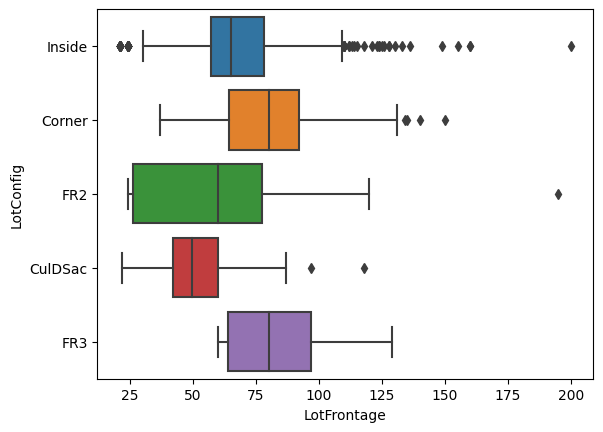

In [38]:
# Lotfrontage / LotConfig - box plot
sns.boxplot(data=df_test, x='LotFrontage', y='LotConfig')

In [39]:
# LotFrontage - fill values - groupby LotConfig and get mean value
df_test['LotFrontage'] = df_test.groupby('LotConfig')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [40]:
# FireplaceQU - fill values - 'None'
missing_data_fireplaceQu_index = df_test[(df_test['FireplaceQu'].isnull() )& (df_test['Fireplaces'] == 0)].index

df_test.loc[missing_data_fireplaceQu_index] = df_test.loc[missing_data_fireplaceQu_index].fillna('None')

In [41]:
# Fence - fill values - 'None'
df_test['Fence'] = df_test['Fence'].fillna('None')

In [42]:
# Alley - fill values - 'None'
df_test['Alley'] = df_test['Alley'].fillna('None')

In [43]:
# MiscFeatures - fill values - 'None'
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('None')

In [44]:
# PoolQC - drop rows
missing_data_test_poolQC_index = df_test[(df_test['PoolQC'].isnull()) & (df_test['PoolArea'] != 0)].index
df_test = df_test.drop(missing_data_test_poolQC_index, axis=0)

In [45]:
# PoolQC - fill values - 'None'
df_test['PoolQC'] = df_test['PoolQC'].fillna('None')

In [46]:
df_test.shape

(1446, 80)

### 1d. Test Data Cleaning Summary

* <b>KitchenQual</b> missing row is reported as having a kitchen however since no quality is recorded we have dropped the row.

* <b>SaleType</b> missing row was dropped as it did not have a corresdoning None value, the value could have been changed to other but this would be uneccessary as it is only one row and wont have enough inpact on the final model.

* <b>GarageCars/ GarageArea</b> missing value changed to 0, the GarageType column did show a detached garage however all other garage features for that row showed no garage which indicates that this was a mistake. The detached value was changed to 'None' to correspond to the other features.
* <b>Exterior1st,Exterior2nd</b> rows dropped as no clear replacement value
* <b>BsmtUnfSF, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtFinType1, BsmtFinType2</b> missing rows all indicate that the property does not have a basment so values were changed to 0 or 'None'
* <b>Functional</b> column values changed to 'Typ', due to note left in description - 'Assume typical unless deductions are warranted' which means there is a high chance that typical functionality is the correct value
* <b>Utilities</b> column has no other values showing in the df other than 'AllPub' which makes this high likely to be the missing value.
* <b>MSZoning</b> has a very high percentage of rows with the value "RL" which makes it logical to fill the missing rows with this value
* <b>MasVnrArea, MasVnrType</b> missing values changed to 0 and None
* <b>BsmtExposure, BmstQual, BsmtCond</b>, the rows where all values for these columns were missing were changed to 'None' as they can be confirmed as having no basment, other rows where only 1 value was missing from from each row has been dropped as these properties did have a basment but some basment features were missing.
* <b>GarageType, GarageQual, GarageYrBlt, GarageFinish, GarageCond</b> rows were changed to 'None' or 0 as they did not have a garage, one row showed that the property had a garage but the data was partially missing so this row was dropped.
* <b>LotFrontage</b>, we have used the 'LotConfig' column to get the LotFrontage mean for each config and used that value to fill the missing values. As can be seen from the box plot generated, each config as a different mean and a fairly different distribution which shows it would be a good estimator.
* <b>FireplaceQu</b> missing values were changed to None as all rows with a missing value did not have a fireplace.
* <b>Fence, Alley, MiscFeatures</b> all missing values were changed to 'None'.
* <b>PoolQC</b> two of the rows with missing values were dropped as they have a poolArea which meant the property had a pool however it was just the quality value missing, the other rows with missing values were changed to 'None' as those properties did not have a pool.

<hr>

<h2>2. Data Exploration</h2>

In [58]:
# split the data into categorical and numeric columns
categorial_cols = df_train.select_dtypes(include='O')
numeric_cols = df_train.select_dtypes(exclude='O')

###